Localisation des dataset :

https://www.data.gouv.fr/datasets/demandes-de-valeurs-foncieres-geolocalisees/   
https://www.data.gouv.fr/datasets/population-municipale-des-communes-france-entiere/

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Affiche toutes les lignes
pd.set_option("display.max_rows", None)

# Affiche toutes les colonnes
pd.set_option("display.max_columns", None)

# Choisis le nombre de caractère par colonnes
pd.set_option("display.max_colwidth", 50)

In [118]:
df_path = "full.csv"

df = pd.read_csv(df_path, low_memory=False)

df.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

In [119]:
col_to_keep = ["valeur_fonciere", "date_mutation", "id_mutation", "nature_mutation", "numero_disposition", "id_parcelle", "code_commune", "nom_commune", "code_postal", "type_local", "nature_culture", "nature_culture_speciale", 
               "nombre_lots", "nombre_pieces_principales", "surface_reelle_bati", "surface_terrain"]

df = df[col_to_keep]

In [120]:
# garder uniquement les maisons et les appartements
type_local_to_keep = ['Maison', 'Appartement']
df = df[(df['type_local'].isin(type_local_to_keep))]

In [121]:
# Vue d"ensemble (shape, dtypes)
def quick_overview(df, name):
    print(f"\n{name.upper()} SHAPE: {df.shape}")
    display(df.head())
    print(f"{name.upper()} Dtypes: \n{df.dtypes.value_counts()}")
    display(df.dtypes)
    display(df.describe(include="all").T)
    
quick_overview(df, "Dataset")


DATASET SHAPE: (992741, 16)


,valeur_fonciere,date_mutation,id_mutation,nature_mutation,numero_disposition,id_parcelle,code_commune,nom_commune,code_postal,type_local,nature_culture,nature_culture_speciale,nombre_lots,nombre_pieces_principales,surface_reelle_bati,surface_terrain
6,329500.0,2024-01-03,2024-4,Vente,1,01173000AI0551,01173,Gex,1170.0,Appartement,NaN,NaN,2,4.0,89.0,NaN
78,94500.0,2024-01-03,2024-7,Vente,1,01202000AC0198,01202,Lagnieu,1150.0,Appartement,sols,NaN,0,3.0,74.0,65.0
80,94500.0,2024-01-03,2024-7,Vente,1,01202000AC0198,01202,Lagnieu,1150.0,Appartement,sols,NaN,0,2.0,32.0,65.0
81,220000.0,2024-01-03,2024-8,Vente,1,010560000C2523,01056,Boyeux-Saint-Jérôme,1640.0,Maison,sols,NaN,0,1.0,40.0,488.0
82,220000.0,2024-01-03,2024-8,Vente,1,010560000C2524,01056,Boyeux-Saint-Jérôme,1640.0,Maison,sols,NaN,0,2.0,80.0,858.0


DATASET Dtypes: 
object     9
float64    5
int64      2
Name: count, dtype: int64


valeur_fonciere              float64
date_mutation                 object
id_mutation                   object
nature_mutation               object
numero_disposition             int64
id_parcelle                   object
code_commune                  object
nom_commune                   object
code_postal                  float64
type_local                    object
nature_culture                object
nature_culture_speciale       object
nombre_lots                    int64
nombre_pieces_principales    float64
surface_reelle_bati          float64
surface_terrain              float64
dtype: object

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
valeur_fonciere,988676.0,NaN,NaN,NaN,884116.623104,5783413.087624,0.15,120000.0,196000.0,325000.0,255000000.0
date_mutation,992741,352,2024-12-20,13448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_mutation,992741,778664,2024-1134925,1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nature_mutation,992741,6,Vente,982511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numero_disposition,992741.0,NaN,NaN,NaN,1.096122,1.248604,1.0,1.0,1.0,1.0,230.0
id_parcelle,992741,627835,97415000CT2791,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
code_commune,992741,30621,31555,8195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nom_commune,992741,28714,Toulouse,8195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
code_postal,992669.0,NaN,NaN,NaN,51943.422434,27756.248742,1000.0,29860.0,54000.0,76210.0,97490.0
type_local,992741,2,Maison,544884,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df.isna().sum()

valeur_fonciere                4065
date_mutation                     0
id_mutation                       0
nature_mutation                   0
numero_disposition                0
id_parcelle                       0
code_commune                      0
nom_commune                       0
code_postal                      72
type_local                        0
nature_culture               368690
nature_culture_speciale      974840
nombre_lots                       0
nombre_pieces_principales        80
surface_reelle_bati              80
surface_terrain              368696
dtype: int64

**Valeurs manquantes à supprimer :**   
On pourrait remplir les valeurs manquantes de "code_postal" mais :
- Une commune peut avoir plusieurs codes postaux (donc il faut la localiser via ces coordonnées gps ou son adresse postale)
- 72 lignes est négligeable pour 1 milions de lignes

Pareil pour "nombre_pieces_principales" et "surface_reelle_bati " (remplacer par une médiane par exemple)

**Valeurs manquantes à remplir :**   
Dans "nature_culture ", "nature_culture_speciale" et "surface_terrain" les NaN correspondent à des valeurs = 0

In [123]:
# Lignes à supprimer
nan_to_drop = ["valeur_fonciere", "code_postal", "nombre_pieces_principales", "surface_reelle_bati"]

df = df.dropna(subset=nan_to_drop)

# Lignes à remplir
nan_to_fill = ["nature_culture", "nature_culture_speciale", "surface_terrain"]

df[nan_to_fill] = df[nan_to_fill].fillna(0)

In [124]:
df.isna().sum()

valeur_fonciere              0
date_mutation                0
id_mutation                  0
nature_mutation              0
numero_disposition           0
id_parcelle                  0
code_commune                 0
nom_commune                  0
code_postal                  0
type_local                   0
nature_culture               0
nature_culture_speciale      0
nombre_lots                  0
nombre_pieces_principales    0
surface_reelle_bati          0
surface_terrain              0
dtype: int64

## Regroupement des biens d'une même parcelle

In [125]:
group_keys = ["date_mutation", "id_mutation", "id_parcelle"]

In [126]:
df_types_parcelle = (
    df.groupby(group_keys)["type_local"]
      .nunique()
      .reset_index(name="nb_types")
)

df_mix_parcelle = df_types_parcelle[df_types_parcelle["nb_types"] > 1]

print(f"Nombre de parcelles avec plusieurs types de bien : {len(df_mix_parcelle)}")

Nombre de parcelles avec plusieurs types de bien : 1782


In [127]:
df_code_postale = (
    df.groupby(group_keys)["code_postal"]
      .nunique()
      .reset_index(name="nb_types")
)

df_mix_code_postale = df_code_postale[df_code_postale["nb_types"] > 1]

print(f"Nombre de parcelle avec plusieurs codes postaux : {len(df_mix_code_postale)}")
print(df_mix_code_postale.head())

Nombre de parcelle avec plusieurs codes postaux : 1
       date_mutation   id_mutation     id_parcelle  nb_types
490016    2024-08-29  2024-1179133  97416000CX0211         2


In [128]:
df[df["id_parcelle"] == "97416000CX0211"]

,valeur_fonciere,date_mutation,id_mutation,nature_mutation,numero_disposition,id_parcelle,code_commune,nom_commune,code_postal,type_local,nature_culture,nature_culture_speciale,nombre_lots,nombre_pieces_principales,surface_reelle_bati,surface_terrain
3366057,155410.0,2024-01-26,2024-1175114,Vente,1,97416000CX0211,97416,Saint-Pierre,97432.0,Appartement,0,0,1,2.0,51.0,0.0
3369982,155000.0,2024-04-29,2024-1176754,Vente,1,97416000CX0211,97416,Saint-Pierre,97432.0,Appartement,0,0,1,3.0,66.0,0.0
3377850,148000.0,2024-08-27,2024-1179002,Vente,1,97416000CX0211,97416,Saint-Pierre,97432.0,Appartement,0,0,1,1.0,44.0,0.0
3378129,1470000.0,2024-08-29,2024-1179133,Vente,1,97416000CX0211,97416,Saint-Pierre,97432.0,Appartement,0,0,1,3.0,66.0,0.0
3378131,1470000.0,2024-08-29,2024-1179133,Vente,1,97416000CX0211,97416,Saint-Pierre,97432.0,Appartement,0,0,1,3.0,66.0,0.0
3378134,1470000.0,2024-08-29,2024-1179133,Vente,1,97416000CX0211,97416,Saint-Pierre,97410.0,Appartement,0,0,1,3.0,62.0,0.0
3378136,1470000.0,2024-08-29,2024-1179133,Vente,1,97416000CX0211,97416,Saint-Pierre,97410.0,Appartement,0,0,1,3.0,66.0,0.0
3378138,1470000.0,2024-08-29,2024-1179133,Vente,1,97416000CX0211,97416,Saint-Pierre,97410.0,Appartement,0,0,1,3.0,66.0,0.0
3378140,1470000.0,2024-08-29,2024-1179133,Vente,1,97416000CX0211,97416,Saint-Pierre,97410.0,Appartement,0,0,1,3.0,66.0,0.0
3378142,1470000.0,2024-08-29,2024-1179133,Vente,1,97416000CX0211,97416,Saint-Pierre,97410.0,Appartement,0,0,1,3.0,66.0,0.0


Saint-Pierre est une commune de la réunion avec les codes postaux 97410 et 97432.

La mutation avec plusieurs codes postaux diffèrents des autres mutations de la parcelle :
- 10 lignes pour cette mutation (1 ligne pour les autres)
- La valeur foncière est 10 fois plus élevé
- Elle se fait deux jours après une autre mutation

On peut supposer :
- Il y a eu une erreur dans le remplissage du bien
- La parcelle englobe plus qu'un bien qui serait à la limite des deux adresses postaux

On a quatres choix :
- Prendre 97432 car toutes les autres mutation de cette parcelle sont sous ce code postale
- Prendre 97410 car s'est le mode de cette mutation
- Séparer la mutation en deux et pondérer la valeur fonciere en fonction de la surface du bien
- Supprimer les lignes de cette mutation car modifier ou séparer la mutation pourrait altérer la prédiction

In [129]:
# Suppression des lignes de la mutation
df = df[df["id_mutation"] != "2024-1179133"]

In [130]:
df_code_commune = (
    df.groupby(group_keys)["code_commune"]
      .nunique()
      .reset_index(name="nb_types")
)

df_mix_code_commune = df_code_commune[df_code_commune["nb_types"] > 1]

print(f"Nombre de parcelle avec plusieurs codes de communes : {len(df_mix_code_commune)}")

Nombre de parcelle avec plusieurs codes de communes : 0


**Description des colonnes**
- "date_mutation" : jour où le bien a été muté de propriétaire
- "id_mutation" : identification de la mutation
- "id_parcelle" : identification du cadastre du bien
- "numero_logement" : nombre de logement regroupe chaque mutations
- "nombre_lots" : nombre de copropriété attachés à une disposition

In [131]:
# Crée une liste avec les valeurs str uniques
def join_type(x: pd.Series) -> str:
    vals = x.astype(str).unique()
    return ", ".join(sorted(vals))

df_agg = df.groupby(group_keys).agg({ "numero_disposition": "count", "nombre_lots": "sum", "code_commune": "first", 
                                     "surface_reelle_bati": "sum", "surface_terrain": "sum", "nombre_pieces_principales": "sum",
                                     "type_local": join_type, "valeur_fonciere": "first"
                                    }).reset_index()

df_agg.rename(columns={"numero_disposition": "nombre_logement"}, inplace=True)

df_agg.head(10)

,date_mutation,id_mutation,id_parcelle,nombre_logement,nombre_lots,code_commune,surface_reelle_bati,surface_terrain,nombre_pieces_principales,type_local,valeur_fonciere
0,2024-01-01,2024-1056023,87085000IN0365,1,0,87085,91.0,4795.0,4.0,Maison,1.0
1,2024-01-02,2024-1002149,83123000AT0556,1,1,83123,30.0,0.0,2.0,Appartement,230240.0
2,2024-01-02,2024-1002281,83054000AE0257,1,1,83054,83.0,0.0,4.0,Maison,367950.0
3,2024-01-02,2024-1002320,83137000DT0857,2,0,83137,334.0,1177.0,8.0,Maison,712600.0
4,2024-01-02,2024-1002374,83019000AW0166,1,1,83019,23.0,0.0,2.0,Appartement,178000.0
5,2024-01-02,2024-1015486,84035000BX1797,1,1,84035,41.0,0.0,2.0,Appartement,95900.0
6,2024-01-02,2024-1015487,84141000BD0319,1,0,84141,95.0,498.0,5.0,Maison,290000.0
7,2024-01-02,2024-1015489,84141000AR0178,1,0,84141,94.0,417.0,4.0,Maison,286000.0
8,2024-01-02,2024-1015490,84007000BO0353,1,1,84007,46.0,0.0,2.0,Appartement,115000.0
9,2024-01-02,2024-1015514,84029000AT0066,2,0,84029,200.0,1234.0,8.0,Maison,247800.0


## Transformation du code commune en données analysable

In [132]:
df_path2 = "POPULATION_MUNICIPALE_COMMUNES_FRANCE.xlsx"

df2 = pd.read_excel(df_path2)

In [133]:
df2.head()

,objectid,reg,dep,cv,codgeo,libgeo,p13_pop,p14_pop,p15_pop,p16_pop,p17_pop,p18_pop,p19_pop,p20_pop,p21_pop
0,115658,52,85,8502,85062,Châteauneuf,968.0,993.0,1013.0,1027.0,1056,1085.0,1114.0,1118.0,1134.0
1,115659,26,58,5808,58300,Urzy,1839.0,1835.0,1828.0,1802.0,1775,1749.0,1746.0,1747.0,1742.0
2,115660,43,70,7012,70137,Chassey-lès-Montbozon,218.0,217.0,216.0,215.0,217,215.0,215.0,220.0,225.0
3,115661,21,51,5123,51649,Vitry-le-François,13174.0,13144.0,12805.0,12552.0,12133,11743.0,11376.0,11458.0,11454.0
4,115662,11,78,7811,78638,Vaux-sur-Seine,4749.0,4715.0,4788.0,4857.0,4927,4929.0,5010.0,5020.0,5083.0


In [134]:
df_agg = df_agg.merge(
    df2[["codgeo", "reg", "dep", "p21_pop"]],
    left_on="code_commune",
    right_on="codgeo",
    how="inner"
)

df_agg = df_agg.drop(columns=["codgeo", "code_commune"])
df_agg = df_agg.rename(columns={"reg": "region", "dep": "departement", "p21_pop": "population_2021"})

print(df_agg.head())

  date_mutation   id_mutation     id_parcelle  nombre_logement  nombre_lots  \
0    2024-01-01  2024-1056023  87085000IN0365                1            0   
1    2024-01-02  2024-1002149  83123000AT0556                1            1   
2    2024-01-02  2024-1002281  83054000AE0257                1            1   
3    2024-01-02  2024-1002320  83137000DT0857                2            0   
4    2024-01-02  2024-1002374  83019000AW0166                1            1   

   surface_reelle_bati  surface_terrain  nombre_pieces_principales  \
0                 91.0           4795.0                        4.0   
1                 30.0              0.0                        2.0   
2                 83.0              0.0                        4.0   
3                334.0           1177.0                        8.0   
4                 23.0              0.0                        2.0   

    type_local  valeur_fonciere  region departement  population_2021  
0       Maison              1.0  

## Ajout de données

In [135]:
df_agg["room_size"] = df_agg["surface_reelle_bati"]/df_agg["nombre_pieces_principales"]

In [139]:
df_agg["date_mutation"]= pd.to_datetime(df_agg["date_mutation"])

df_agg["annees_mutation"]= df_agg["date_mutation"].dt.year
df_agg["mois_mutation"]= df_agg["date_mutation"].dt.month
df_agg["jour_mutation"]= df_agg["date_mutation"].dt.day

df_agg.head()

,date_mutation,id_mutation,id_parcelle,nombre_logement,nombre_lots,surface_reelle_bati,surface_terrain,nombre_pieces_principales,type_local,valeur_fonciere,region,departement,population_2021,room_size,annees_mutation,mois_mutation,jour_mutation
0,2024-01-01,2024-1056023,87085000IN0365,1,0,91.0,4795.0,4.0,Maison,1.0,74,87,129760.0,22.75,2024,1,1
1,2024-01-02,2024-1002149,83123000AT0556,1,1,30.0,0.0,2.0,Appartement,230240.0,93,83,17268.0,15.00,2024,1,2
2,2024-01-02,2024-1002281,83054000AE0257,1,1,83.0,0.0,4.0,Maison,367950.0,93,83,9658.0,20.75,2024,1,2
3,2024-01-02,2024-1002320,83137000DT0857,2,0,334.0,1177.0,8.0,Maison,712600.0,93,83,180452.0,41.75,2024,1,2
4,2024-01-02,2024-1002374,83019000AW0166,1,1,23.0,0.0,2.0,Appartement,178000.0,93,83,8173.0,11.50,2024,1,2


## Analyse des features

In [140]:
cat_data = ["annee_mutation", "type_local", "departement"]

num_data = df_agg.select_dtypes(include=["number"])
print(num_data.columns)

Index(['nombre_logement', 'nombre_lots', 'surface_reelle_bati',
       'surface_terrain', 'nombre_pieces_principales', 'valeur_fonciere',
       'region', 'population_2021', 'room_size', 'annees_mutation',
       'mois_mutation', 'jour_mutation'],
      dtype='object')


### Données qualitatives

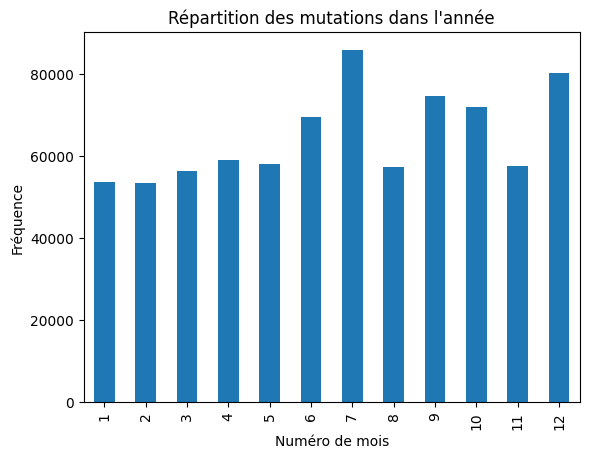

In [145]:
df_agg["mois_mutation"].value_counts().sort_index(ascending=True).plot(kind="bar")
plt.title(f"Répartition des mutations dans l'année")
plt.xlabel("Numéro de mois")
plt.ylabel("Fréquence")
plt.show()

### Données quantitatives

## Valeurs abérantes

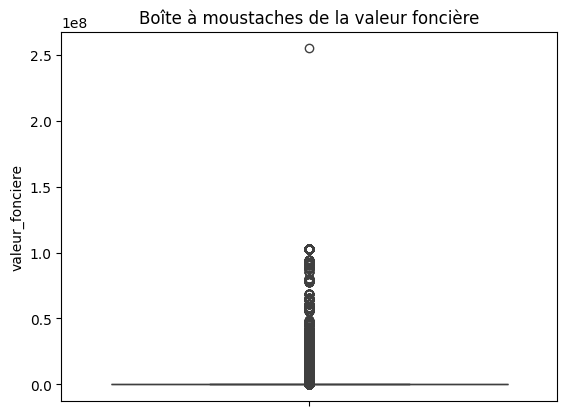

In [146]:
plt.figure()
sns.boxplot(df["valeur_fonciere"], vert=True, showfliers=True)
plt.ylabel("valeur_fonciere")
plt.title("Boîte à moustaches de la valeur foncière")
plt.show()